In [42]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the cleaned dataset
df = pd.read_csv("C:/Users/igal_/Downloads/Customer Purchasing Behaviors.csv")

print(df.head())

   user_id  age  annual_income  purchase_amount  loyalty_score region  \
0        1   25          45000              200            4.5  North   
1        2   34          55000              350            7.0  South   
2        3   45          65000              500            8.0   West   
3        4   22          30000              150            3.0   East   
4        5   29          47000              220            4.8  North   

   purchase_frequency  
0                  12  
1                  18  
2                  22  
3                  10  
4                  13  


We do not need to use the User ID column in our prediction as it is not a feature or a target variable.

In [4]:
# Drop unnecessary columns
df = df.drop(columns=["user_id"])

When we check our variables, we notice that the variable Region is categorical. In order to be able to process it in our prediction, we need to assign numeric values to the categorical values. Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted.

In [39]:
# Encode categorical variables (Region)
label_encoder = LabelEncoder()
df["region"] = label_encoder.fit_transform(df["region"])

print(df["region"])

0      1
1      2
2      3
3      0
4      1
      ..
233    3
234    1
235    2
236    3
237    1
Name: region, Length: 238, dtype: int64


In [31]:
# Define features and target variable
features = ["age", "annual_income", "purchase_amount", "purchase_frequency", "region"]
target = "loyalty_score"

X = df[features]
y = df[target]

In [32]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[["age", "annual_income", "purchase_amount", "purchase_frequency"]] = scaler.fit_transform(
    X_train[["age", "annual_income", "purchase_amount", "purchase_frequency"]])
X_test[["age", "annual_income", "purchase_amount", "purchase_frequency"]] = scaler.transform(
    X_test[["age", "annual_income", "purchase_amount", "purchase_frequency"]])


In [33]:
# Train Linear Regression Model
lin_reg = LinearRegression()
# Fit Linear Regression Model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict loyalty scores using Linear Regression
y_pred_lin = lin_reg.predict(X_test)

In [35]:
# Evaluate the Linear Regression model
mse = mean_squared_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)

print("Mean Squared Error:", mse, 
      "R2 Score:", r2)

Mean Squared Error: 0.03679285020674572 R2 Score: 0.9910984665934057


In [ ]:
# Train Random Forest Regression Model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the Random Forest Regression Model
rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [44]:
# Predict loyalty scores using Random Forest Regression
y_pred_rf = rf_reg.predict(X_test)

In [37]:
# Evaluate the Random Forest Regression model
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("Mean Squared Error:", mse, 
      "R2 Score:", r2)

Mean Squared Error: 0.0020716666666666488 R2 Score: 0.9994987882173564


Conclusion:

Random Forest Regression has a lower Mean Squared Error score and a higher R2 score, thus we can conclude it's a better model for this dataset.

We know that Random Forest Regression provided prediction scores of high accuracy but can we improve them even further?
The answer is yes. 

In order to improve our Random Forest Regression, we can use cross-validation.

Why Use Cross-Validation?

-Reduces Overfitting → Model isn’t evaluated on just one test set. 

-More Reliable Performance Metrics → Uses multiple test sets instead of one. 

-Better Generalization → Ensures the model works well on new data 

In [40]:
# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(rf_reg, X, y, cv=5, scoring="r2")

# Print the results
print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", cv_scores.mean())
print("Standard Deviation of R² Scores:", cv_scores.std())

Cross-Validation R² Scores: [0.97380863 0.99999942 0.99999919 0.99999967 0.99999961]
Mean R² Score: 0.9947613013765746
Standard Deviation of R² Scores: 0.010476337556133137


Now we would like to visualize which features are most important in predicting loyalty scores. In terms of business applications, predictions can help decision-makers understand the factors influencing outcomes, leading to better-informed actions.

C:\Users\igal_\AppData\Local\Temp\ipykernel_21820\1465083335.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


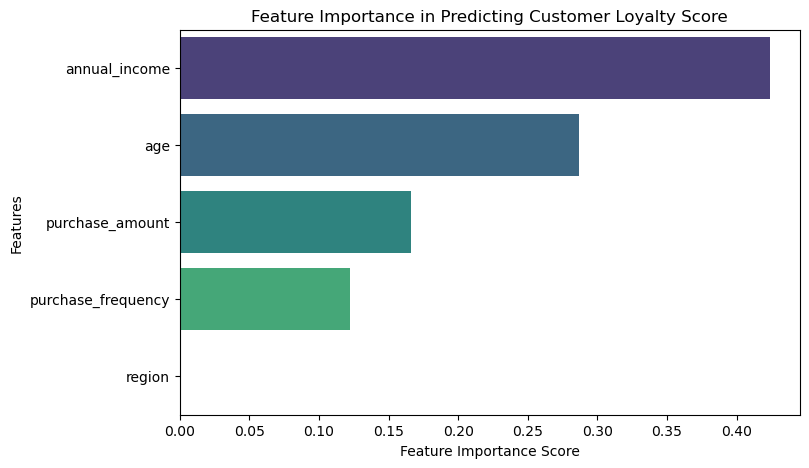

In [43]:
# Get feature importance from the Random Forest model
feature_importance = rf_reg.feature_importances_
feature_names = features

# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Customer Loyalty Score")
plt.show()